__Solution on Basic Predictive Models__

BAS 474

Charles Liu

In [2]:
library(regclass)
library(caret)

Loading required package: bestglm

Loading required package: leaps

Loading required package: VGAM

Loading required package: stats4

Loading required package: splines

Loading required package: rpart

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Important regclass change from 1.3:
All functions that had a . in the name now have an _
all.correlations -> all_correlations, cor.demo -> cor_demo, etc.


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:regclass’:

    qq


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘caret’


The following object is masked from ‘package:VGAM’:

    predictors




In [3]:
load("Homework_on_prediction.RData")

# 1.

The `PRODLAUNCH` dataset records the profit (`Profit` column) of 652 newly released products after the first few months of their release.  A total of 20 predictor variables (`x1`, `x2`, ..., `x20`) may contain some predictive power regarding the product's `Profit`.  The boss wants a very simple model for predicting profit:  only at most two predictor variables (e.g. predicting `Profit` from `x4` and `x12`).  A nested `for` loop is a great way to try out each combination of predictors.

a. Run `summary` on `PRODLAUNCH[,c(1,5,16)]` to verify that these three columns are the `Profit`, `x4`, and `x15` predictor variables.  You'll see that `x15` has 0s for each value.

In [4]:
summary( PRODLAUNCH[,c(1,5,16)] )

     Profit            x4               x15   
 Min.   :3.544   Min.   :      2   Min.   :0  
 1st Qu.:3.875   1st Qu.:  67640   1st Qu.:0  
 Median :4.190   Median : 255662   Median :0  
 Mean   :4.264   Mean   : 443630   Mean   :0  
 3rd Qu.:4.592   3rd Qu.: 621939   3rd Qu.:0  
 Max.   :6.093   Max.   :5417231   Max.   :0  

b.  Split the data into 50% training and 50% holdout.  Verify the summaries on the `Profit` column are as provided.

In [5]:
set.seed(2021)
train.rows <- sample(1:nrow(PRODLAUNCH),0.5*nrow(PRODLAUNCH))
TRAIN <- PRODLAUNCH[train.rows,]
HOLDOUT <- PRODLAUNCH[-train.rows,]
summary(TRAIN$Profit); summary(HOLDOUT$Profit)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.544   3.813   4.176   4.268   4.623   6.093 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.544   3.903   4.204   4.260   4.556   5.901 

c. Using `lm`!  Recall that the syntax for predicting a variable named `y` from ALL variables in a dataset named `DATA` is `lm(y~.,data=DATA)`.
Adapt this syntax so that `~.` is  used as the formula and the three appropriate columns (as mentioned in part a) of `TRAIN` are used for the `data=` argument.
Verify the `summary` of the model produced is as below.  Figure out and explain why all values in the `x15` of `summary` only has `NA`s.

In [6]:
MODEL <- lm(Profit~.,data=TRAIN[,c(1,5,16)])
summary(MODEL)


Call:
lm(formula = Profit ~ ., data = TRAIN[, c(1, 5, 16)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78056 -0.31247 -0.02691  0.28121  1.06219 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.998e+00  2.726e-02  146.68   <2e-16 ***
x4          5.779e-07  3.388e-08   17.05   <2e-16 ***
x15                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4008 on 324 degrees of freedom
Multiple R-squared:  0.4731,	Adjusted R-squared:  0.4714 
F-statistic: 290.9 on 1 and 324 DF,  p-value: < 2.2e-16


**Response:**

Since x15 only has a single value (a “singularity”), it’s impossible to tell how Profit varies with x15. The values are NA because the model cannot estimate a coefficient for x15 from the data.

d.  The `RESULTS` matrix produced below is set up so that you can record the RMSE on the holdout sample for all models that contain at most two predictors (the value in the row labeled x2 and column labeled x3 will be the RMSE on the holdout when x2 and x3 are used as predictors; the value in the row labeled x1 and column labeled x1 will be the RMSE on the holdout when x1 and x1, i.e., just x1, are used as predictors).

Use a nested `for` loop to fill in its entries.  Note:  you'll receive numerous warnings saying `prediction from a rank-deficient fit may be misleading`, but this is ok (it's just letting you know that R had trouble estimating the coefficients for the model).  Produce the two sanity checks and determine which model happens to do the best on this holdout sample.

Hint:  you'll likely need an `if` statement.  If your looping variables are named `i` and `j`, then you'll want to check whether `i` equals `j`.  If it does, predict the profit from the single relevant variable.  If not, predict the profit from both relevant variables.

In [7]:
RESULTS <- matrix(0,nrow=20,ncol=20)
rownames(RESULTS) <- colnames(RESULTS) <- paste("x",1:20,sep="")
RESULTS[ c(1:3,18:20), c(1:3,18:20) ]

,x1,x2,x3,x18,x19,x20
x1,0,0,0,0,0,0
x2,0,0,0,0,0,0
x3,0,0,0,0,0,0
x18,0,0,0,0,0,0
x19,0,0,0,0,0,0
x20,0,0,0,0,0,0


,row,col
x4,4,2
x2,2,4


[1] 0.2850573

In [ ]:
options(warn=-1)
for (i in 1:20) {
  for (j in 1:20) {
    if(i==j) {
        M <- lm(Profit~.,data=TRAIN[,c(1,i+1)])
    } else {
        M <- lm(Profit~.,data=TRAIN[,c(1,i+1,j+1)])
    }
    RESULTS[i,j] <- sqrt( mean( (HOLDOUT$Profit - predict(M,newdata=HOLDOUT))^2 ) )
  }
}
options(warn=0)

which(RESULTS==min(RESULTS),arr.ind=TRUE)
RESULTS[2,4]

In [8]:
RESULTS[1:3,1:3]
RESULTS[18:20,9:11]

,x1,x2,x3
x1,0.4769736,0.3408225,0.3906520
x2,0.3408225,0.3387403,0.3350729
x3,0.3906520,0.3350729,0.3903620


,x9,x10,x11
x18,0.4661608,0.4690613,0.4666268
x19,0.4725113,0.4758977,0.4733487
x20,0.4713422,0.4748864,0.4718561


**Response:**

Looks like predicting Profit from x2 and x4 is the way to go.

__Grading:__ 4 points total. 0.5 for (a), 0.5 for verifying (b), 1 for response in (c), and 2 points for (d) where 1 is for the sanity check and 2 is for the best two predictors.

# 2.

"Overfitting" is often our biggest fear when we develop a predictive model.  In package `regclass`, `overfit_demo` provides an illustration that shows what happens when a model becomes "overfit" as it gets overly complex (by adding too many variables).  Run `overfit_demo` as set up below.  The "AIC" is a measure of how "close to the truth" the model is (discussed at length in BAS 320), and it's closely related the RMSE on the training data.  For this example, what is the optimal level of complexity (number of predictors) for this model?

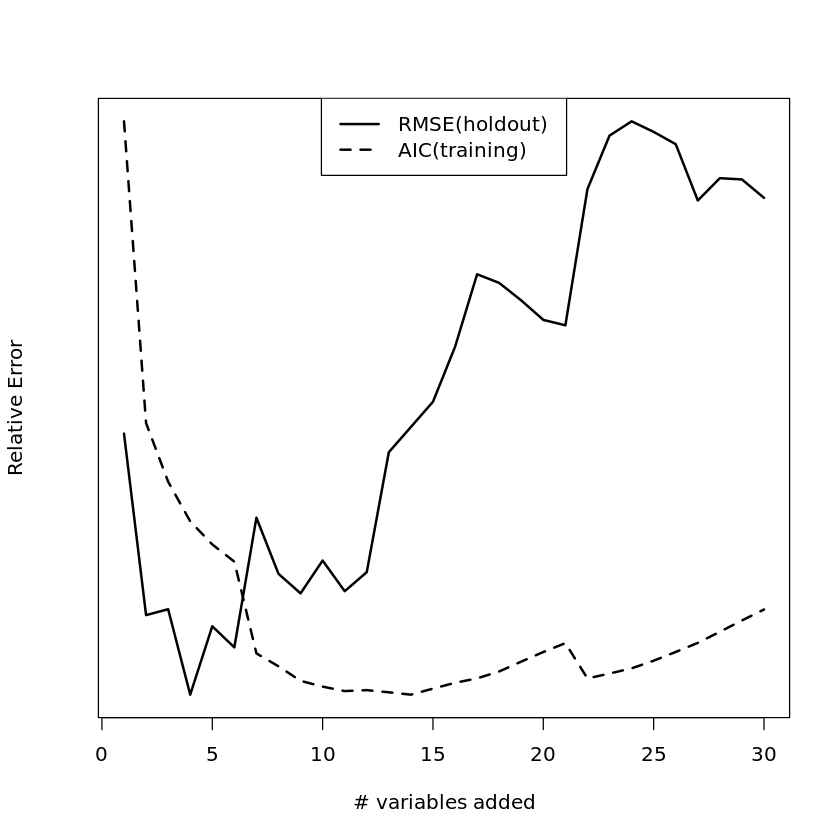

In [9]:
library(regclass)
data(OFFENSE)
overfit_demo(OFFENSE,y="Win",seed=1111)

**Response:**

As the model adds more and more variables (becoming more complex), the typical error on a holdout sample decreases (gets better) up to a point, then starts getting larger (gets worse).

It looks like the optimal complexity is a model with 4 predictors since this is where the typical error on new individuals is smallest.

**Grading:** 1 point

# 3.

Learning how to specify the model you want to fit is a necessary skill for linear regression models!  Imagine the predictors are `x1`, `x2`, ..., `x50` and the variable we want to predict is `y`.  Fill in to the right of the `~` an appropriate "formula" so that the model predicts `y` from the combination of specified variables.  For example `y~x1` would predict `y` only from `x1`.

*	All 50 predictor variables: `y ~ .`
*	All 50 predictor variables as well as their two-way interactions: `y ~ .^2`
*	All 50 predictor variables except x2 and x27: `y ~ . - x2 - x27`
*	Just x12, x42, and x46: `y ~ x12 + x42 + x46`
*	Just x12, x42, and x46, as well and their two way interactions: `y ~ (x12 + x42 + x46)^2`
*   All 50 predictor variables except x33 and x49, and also including two-way interactions between x2 and x3, and between x4 and x5: `y ~. -x33 - x49 + x2*x3 + x4*x5`

**Grading:** 3 points

# 4.

Consider the `VALUE` data.  Using the `lm` function (not `train` from `caret`), fit a multiple regression model predicting `CustomerLV` (a customer's total lifetime value to a company) using all predictors (no interactions) on the entirety of the data.  Print to the screen a `summary` of the fitted model and then *interpret* the coefficients of:

* `TotTransactions` - the total number of transactions made by the customer

* `GenderMale` - an indicator variable (1 = male, 0 = female)

* `Incomef30t45` an indicator variable (1 = yearly income is between 30 and 45K, 0 = otherwise; reference level is `f0t30` which means 30K or less)

In [10]:
MODEL <- lm(CustomerLV~., data=VALUE)
summary(MODEL)


Call:
lm(formula = CustomerLV ~ ., data = VALUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-468.28 -122.88  -16.23  108.71 1727.88 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -511.0291    44.8839 -11.386  < 2e-16 ***
GenderMale        97.0048    18.6326   5.206 2.85e-07 ***
MarriedSingle    -17.0395    21.2575  -0.802   0.4232    
Incomef30t45     -22.5156    36.9203  -0.610   0.5422    
Incomef45t60      -4.2457    37.5387  -0.113   0.9100    
Incomef60t75      51.9341    38.0323   1.366   0.1727    
Incomef75t90      84.1395    39.6848   2.120   0.0345 *  
Incomef90toINF   203.1467    43.8105   4.637 4.55e-06 ***
FirstPurchase      2.5364     0.2147  11.816  < 2e-16 ***
LoyaltyCardYes    -4.7118    20.5600  -0.229   0.8188    
WalletShare        6.7521     0.8257   8.177 2.54e-15 ***
TotTransactions  165.9598     7.0040  23.695  < 2e-16 ***
LastTransaction  -21.6593     3.9138  -5.534 5.12e-08 ***
---
Signif. codes:  0 ‘***’ 0

**Responses:**

* `TotTransactions`: Two otherwise identical customers (gender, marital status, income, loyalty card status, wallet share, and who spent the same amounts on their first and last transactions) that differ in total transactions by 1 are expected to differ in lifetime value by 166 dollars, with the customer with more transactions expected to have the higher lifetime value.
* `Gendermale`: The difference in average lifetime values between otherwise identical men and women (with regards to marital status, income, loyalty card status, wallet share, and who have made the same number of transactions and spent the same on their first and last transactions) is 97 dollars (men being higher).
* `Incomef30t45`: The difference in average lifetime values between customers making between 30 to 45K a year vs. customers making 30K or less (and who are otherwise identical with regards to marital status, income, loyalty card status, wallet share, and who have made the same number of transactions and spent the same on their first and last transactions) is 22.5 dollars (with 30-40K lower than 30K or less).

**Grading:** 3 points

# 5.

In nearly every example we will do, the split into training and holdout samples is done with the `sample` command so that which rows the two sets are picked at random.  Why can't we just, say, let the first 20% of rows in the data be the holdout sample?  Come up with an example where this would be a bad idea.  Hint:  whatever splitting method we use is "fine" as long as there is *no systematic difference in the characteristics of individuals* in the holdout sample and in the training samples.

**Response:**

If the rows in the data are sorted in some regard (say, with respect to variable x1), then picking the first 20% of rows to be the holdout would be a bad idea because individuals in the holdout sample would have uniformly smaller values of x1 than individuals in the training sample.

**Grading:** 1 point.

# 6.

K-fold crossvalidation will be our go-to method for estimating the generalization error of a predictive model, but there are other techniques.  The "bootstrap" approach estimates the generalization error by generating "bootstrap training samples".

A bootstrap training sample is made by randomly selecting rows from the original training dataset.  This selection is done *with* replacement, so some rows gets picked more than once, and others don't get picked at all.

The error for a particular round of the bootstrap procedure is found by calculating the error made by a model fit on the bootstrap training sample when predicting values on the "leftover" rows (the ones in the original data that do not appear in the bootstrap training sample).  After all rounds are completed (and there can be hundreds), the errors for each round are averaged together to give a final estimate.

To keep things simple, we'll just deal with a vanilla linear regression with no interactions.

a.  Run the following chunk of code, which will random split up the rows from the `DOZER` data (goal is to predict the `Price` of a bulldozer at auction from its characteristics) into a training and holdout sample (60-40 split).

In [11]:
set.seed(474)
train.rows <- sample( 1:nrow(DOZER), 0.60*nrow(DOZER) )
TRAIN <- DOZER[train.rows,]
HOLDOUT <- DOZER[-train.rows,]


b.  Run the command `boot.train.rows <- sort( sample( 1:nrow(TRAIN), size=nrow(TRAIN), replace=TRUE ) )`.

This sets the random number seed, then randomly picks row positions (with replacement) of the `TRAIN` dataframe.

Print the contents of `boot.train.rows` to the screen (its a lot of output but it's ok to include this in your writeup), and you'll see that some positions appear more than once (e.g., 3, 7, 121) and some positions don't appear at all (e.g. 1, 2, 9).   Then print to the screen the result of running `(1:nrow(TRAIN))[-boot.train.rows]` and explain in English what these numbers represent.

In [14]:
set.seed(474)
boot.train.rows <- sort( sample( 1:nrow(TRAIN), size=nrow(TRAIN), replace=TRUE ) )

In [ ]:
boot.train.rows

In [15]:
(1:nrow(TRAIN))[-boot.train.rows]

[1]   2   3   4   6   6   7   7   8   8   8   9  11  12  13  14  14  15  16
 [19]  16  16  17  17  19  21  22  24  26  26  28  33  33  36  37  37  38  39
 [37]  39  42  42  42  43  43  44  45  47  47  47  47  48  50  50  50  52  53
 [55]  53  54  54  56  56  57  57  58  59  60  60  61  64  65  66  67  68  69
 [73]  69  71  71  73  74  75  75  76  76  76  77  77  77  78  79  79  80  80
 [91]  81  81  81  84  86  91  92  94  94  95  95  97  97  99 101 104 104 106
[109] 109 109 109 112 112 115 116 116 117 118 122 122 125 126 126 126 127 128
[127] 129 129 129 129 130 130 131 136 138 139 140 149 149 151 152 155 155 155
[145] 155 155 156 157 157 159 160 161 161 162 162 163 163 163 163 164 165 167
[163] 168 171 172 173 174 174 174 175 176 176 178 178 179 180 184 184 186 186
[181] 189 189 189 191 192 194 195 195 195 195 199 200 200 200 202 203 203 203
[199] 208 208 210 210 211 211 211 212 212 212 213 213 214 215 216 216 216 216
[217] 218 219 220 220 221 221 223 225 227 228 229 230 232 234 235 235 236 237
[235] 238 239 241 241 241 243 243 244 244 244 250 254 255 255 255 256 256 258
[253] 259 260 261 264 264 264 265 267 270 270 270 272 273 274 274 277 279 279
[271] 280 281 281 283 284 285 288 289 290 291 294 295 298 298 299 299 300 300
[289] 300 303 303 303 304 306 307 308 309 310 311 312 314 315 316 318 319 319
[307] 319 319 319 320 320 320 321 321 323 323 325 326 327 328 328 329 329 330
[325] 331 332 332 333 334 336 340 340 341 341 342 344 345 346 346 347 347 350
[343] 350 351 351 351 352 354 356 357 357 358 358 360 362 362 362 363 366 366
[361] 368 368 370 371 373 373 374 374 375 375 379 380 383 384 386 386 387 387
[379] 390 391 392 393 393 394 396 396 397 398 400 402 404 404 405 406 407 408
[397] 408 409 409 410 411 412 412 412 415 415 417 417 420 420 421 421 423 424
[415] 425 427 428 429 429 429 431 431 432 433 435 438 439 439 441 442 443 444
[433] 446 447 448 448 449 449 449 449 451 451 451 452 452 453 457 457 457 458
[451] 459 465 467 467 468 470 471 472 473 477 477 477 478 479 480 482 482 483
[469] 483 483 483 484 485 486 486 487 490 490 490 491 492 492 492 494 494 495
[487] 495 496 497 498 498 499 501 503 503 504 505 505 505 506 506 508 509 509
[505] 511 511 511 512 514 514 517 518 523 523 523 525 526 527 527 529 530 531
[523] 531 532 533 536 537 537 538 539 539 539 539 539 539 539 540 540 541 542
[541] 543 546 547 547 548 549 550 551 552 552 553 554 554 554

[1]   1   5  10  18  20  23  25  27  29  30  31  32  34  35  40  41  46  49
 [19]  51  55  62  63  70  72  82  83  85  87  88  89  90  93  96  98 100 102
 [37] 103 105 107 108 110 111 113 114 119 120 121 123 124 132 133 134 135 137
 [55] 141 142 143 144 145 146 147 148 150 153 154 158 166 169 170 177 181 182
 [73] 183 185 187 188 190 193 196 197 198 201 204 205 206 207 209 217 222 224
 [91] 226 231 233 240 242 245 246 247 248 249 251 252 253 257 262 263 266 268
[109] 269 271 275 276 278 282 286 287 292 293 296 297 301 302 305 313 317 322
[127] 324 335 337 338 339 343 348 349 353 355 359 361 364 365 367 369 372 376
[145] 377 378 381 382 385 388 389 395 399 401 403 413 414 416 418 419 422 426
[163] 430 434 436 437 440 445 450 454 455 456 460 461 462 463 464 466 469 474
[181] 475 476 481 488 489 493 500 502 507 510 513 515 516 519 520 521 522 524
[199] 528 534 535 544 545

**Response:**

The row numbers in TRAIN that do NOT appear in the bootstrap training sample.

c.  Using the results from (b), create a dataframe called `PSEUDO.TRAIN` which are the rows in `TRAIN` that appear in `boot.train.rows`.  Create a dataframe called `PSEUDO.HOLDOUT` which contains all rows in `TRAIN` that do not put in `PSEUDO.TRAIN`. Verify you pass the sanity checks.

In [12]:
PSEUDO.TRAIN <- TRAIN[boot.train.rows,]
PSEUDO.HOLDOUT <- TRAIN[(1:nrow(TRAIN))[-boot.train.rows],]

dim(PSEUDO.TRAIN)
dim(PSEUDO.HOLDOUT)

[1] 554   6

[1] 203   6


d.  Using the `lm` function (not `train` from `caret`), fit a multiple regression model predicting `Price` using all predictors (no interactions) on `PSEUDO.TRAIN`, then store its predictions on the holdout sample in a vector called `pred.holdout`.  Produce a `summary` of the predictions and confirm you get the same numbers.




In [13]:
MODEL <- lm(Price~.,data=PSEUDO.TRAIN)
pred.holdout <- predict(MODEL,newdata=PSEUDO.HOLDOUT)
summary(pred.holdout)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24861   49914   68726   72251  102534  122158 

e.  Use the predicted values and calculate the RMSE on this pseudo-holdout sample.
Hint: a vector of the squared errors can be produced with `(pred.holdout-PSEUDO.HOLDOUT$Price)^2`.
If you take the average of that vector, then take the square root, you have the RMSE!

In [14]:
sqrt(   mean(  (pred.holdout-PSEUDO.HOLDOUT$Price)^2 )  )

[1] 22432.08


f.  Now write a "for" loop that finds the RMSEs of models trained on 500 bootstrapped training samples.  You've already written almost all the code you need.

*  Outside the "for" loop, initialize `boot.rmse` to be an empty vector
*  Set up the loop so your looping vector is the integer sequence 1, 2, ..., 500
*  Store in the i-th element in `boot.rmse` the RMSE found during the i-th time through the loop
*  Make sure to have `set.seed(2019);` on the same line as (and immediately *before*) the `for` loop (but nowhere else) so that the same random set of bootstrap samples are generated for all of us.

Report the average value of `boot.rmse` and its standard deviation (this is the estimated generalization error and the SD), and make a histogram of `boot.rmse`.  Note:  this loop will take a while to run (and thus make the knitting process take a while).  Instead of looping over `1:500` once you think you've worked out the logic, try looping over `1:5` first to make sure it proceeds smoothly.




[1] 22935.08

[1] 874.2843

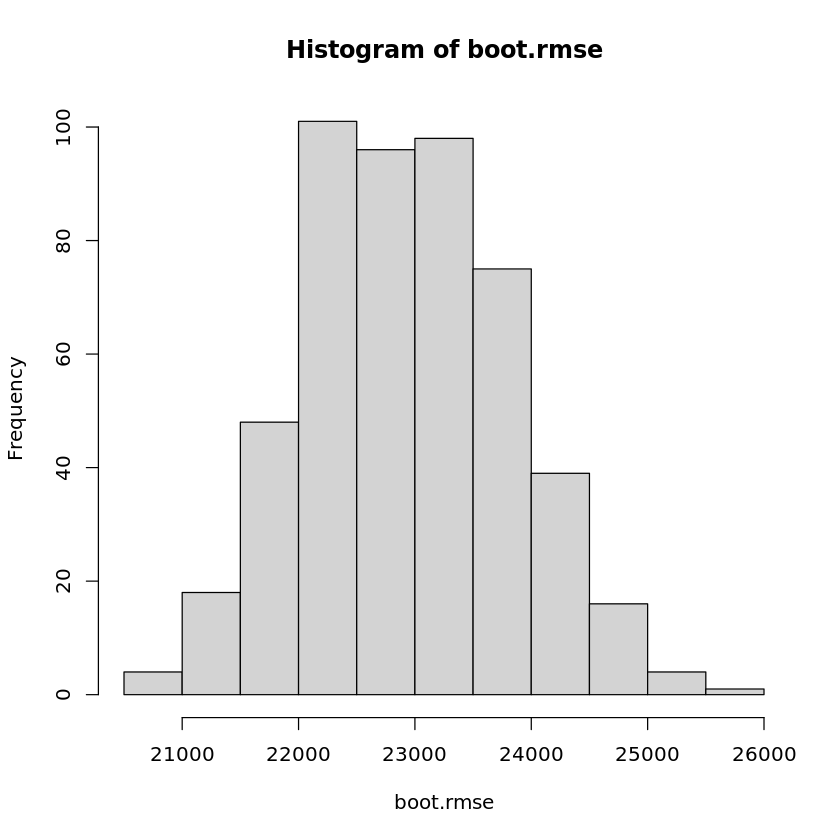

In [15]:
boot.rmse <- c()
set.seed(2019)
for (i in 1:500) { 
  boot.train.rows <- sort( sample( 1:nrow(TRAIN), size=nrow(TRAIN), replace=TRUE ) )
  PSEUDO.TRAIN <- TRAIN[boot.train.rows,]
  PSEUDO.HOLDOUT <- TRAIN[(1:nrow(TRAIN))[-boot.train.rows],]
  MODEL <- lm(Price~.,data=PSEUDO.TRAIN)
  pred.holdout <- predict(MODEL,newdata=PSEUDO.HOLDOUT)
  boot.rmse[i] <- sqrt(   mean(  (pred.holdout-PSEUDO.HOLDOUT$Price)^2 )  )
}
mean(boot.rmse)
sd(boot.rmse)
hist(boot.rmse)

**Additional SideNote:**

This bootstrapped estimate of the generalization error can be found with `caret` using `method="boot"` instead of `method="cv"` or `method="repeatedcv"`!

**Grading:** 6 points.

# 7.

Three models are being considered.  The estimated generalization errors of each have been found with cross validation.  When answering the following questions, find and report the number of standard deviations that separate the two models' errors (remember to use the larger of the two standard deviations).

* Model A has an estimate of 25.3 with an SD of 3.2

* Model B has an estimate of 29.1 with an SD of 3.5

* Model C has an estimate of 31.9 with an SD of 2.2

In [16]:
#math if you need it
(29.1-31.9)/3.5 #question a
(25.3-29.1)/3.5 #question b

[1] -0.8

[1] -1.085714

a)  According to the one standard deviation rule, is there a preference between Model B and Model C?  Explain.

**Response:**

No, Model C’s estimated error less than 1 SD below Model B’s. The difference in estimated errors is (31.9 - 29.1) = 2.8. Divided by the larger of the two standard deviations, this works out to be 2.8/3.5 = 0.8.

b)  According to the one standard deviation rule, is there a preference between Model A and Model B?  Explain.

**Response:**

Yes, the estimated errors are more than 1 SD from each other. The difference in estimated errors is (29.1-25.3) = 3.8. Divided by the larger of the two standard deviations, this works out to be 1.086.

**Grading:** 2 points